* **This kernel is based on one of the exercises in the excellent book: [Deep Learning with Python by Francois Chollet](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438)
**
* The kernel imports the IMDB reviews (originally text - already transformed by Keras to integers using a dictionary)
* Vectorizes and normalizes the data
* Compiles a multi layers NN
* Monitors the learning / validation curves for loss and accuracy
* Try and error with different layers and hidden units
* Employs L1 and L2 weight regularization
* Implements a DROPOUT layer

* The above mentioned book is a **MUST READ**.
* *Thanks Francois for an amazing book !*

In [10]:
# IMPORT MODULES
# TURN ON the GPU !!!
# If importing dataset from outside - like this IMDB - Internet must be "connected"

import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.datasets import imdb

print(os.getcwd())
print("Modules imported \n")
print("Files in current directory:")
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

/opt/app-root/src/imdb_deploy/Kaggle code
Modules imported 

Files in current directory:



In [11]:
# LOAD IMDB DATA

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [12]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


In [63]:
# See an actual review in words
# Reverse from integers to words using the DICTIONARY (given by keras...need to do nothing to create it)

word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[121]])

print(decoded_review)
print(train_labels[121])

? i also having endured hundreds of children's movies in the past consider this to be one of the worst i have ever seen br br 1 i ? in this day and age having to explain to my children that russia is not the bad guys also that mocking russian names like ? is inappropriate br br 2 the grandfather ? birthday party scene contained a quasi sexist joke in which he implied that males drink beer and women talk on the phone two other flies also needlessly use the word crap twice br br 3 the whole movie largely ? of 1950's stereotypes and propaganda that i thought we as a nation were proud to have ? above br br in all it's just crude badly animated even more badly written and not worth wasting the time to view
0


In [14]:
# VECTORIZE as one cannot feed integers into a NN 
# Encoding the integer sequences into a binary matrix - one hot encoder basically
# From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix) of 10k columns

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [15]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [16]:
# VECTORIZE the labels too - NO INTEGERS only floats into a tensor...(rare exceptions)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [17]:
# Set a VALIDATION set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [59]:
# NN MODEL

# Use of DROPOUT
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Use of REGULARIZATION
#model = models.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

# REGULARIZERS L1 L2
#regularizers.l1(0.001)
#regularizers.l2(0.001)
#regularizers.l1_l2(l1=0.001, l2=0.001)

# OPTIMIZERS
#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
# FIT / TRAIN model

NumEpochs = 60
BatchSize = 512

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# model.compile(optimizer='adam', loss='categoricalcrossentropy', metrics=['acc'])


history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/60
30/30 [==============================] - 1s 21ms/step - loss: 1.4747 - acc: 0.5946 - val_loss: 0.8758 - val_acc: 0.7340
Epoch 2/60
30/30 [==============================] - 0s 6ms/step - loss: 0.7793 - acc: 0.7027 - val_loss: 0.7001 - val_acc: 0.8348
Epoch 3/60
30/30 [==============================] - 0s 6ms/step - loss: 0.6941 - acc: 0.7481 - val_loss: 0.6412 - val_acc: 0.8354
Epoch 4/60
30/30 [==============================] - 0s 6ms/step - loss: 0.6622 - acc: 0.7705 - val_loss: 0.6042 - val_acc: 0.8564
Epoch 5/60
30/30 [==============================] - 0s 6ms/step - loss: 0.6328 - acc: 0.7981 - val_loss: 0.5751 - val_acc: 0.8623
Epoch 6/60
30/30 [==============================] - 0s 6ms/step - loss: 0.6102 - acc: 0.8149 - val_loss: 0.5482 - val_acc: 0.8617
Epoch 7/60
30/30 [==============================] - 0s 6ms/step - loss: 0.6005 - acc: 0.8187 - val_loss: 0.5333 - val_acc: 0.8663
Epoch 8/60
30/30 [==============================] - 0s 6ms/step - loss: 0.5842 - acc: 0.8

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

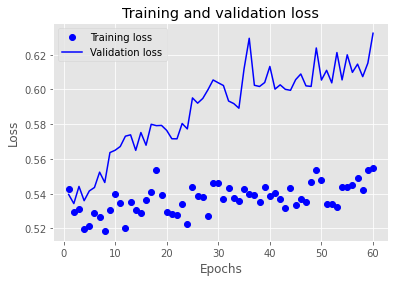

In [32]:
# VALIDATION LOSS curves

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

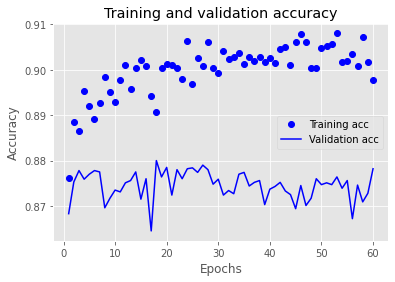

In [33]:
# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# PREDICT

model.predict(x_test)

array([[0.0966675 ],
       [1.        ],
       [0.9978155 ],
       ...,
       [0.14233494],
       [0.05608827],
       [0.8541327 ]], dtype=float32)

In [36]:
if not os.path.exists('../output'):
    os.mkdir('../output')
model.save('output/sentiment2.model.h5')


In [37]:
x_test [1,:]

array([0., 1., 1., ..., 0., 0., 0.])

In [38]:
x_test


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [41]:
model.predict(x_test [1:2,:])

array([[1.]], dtype=float32)

In [42]:
x_test.shape



(25000, 10000)

In [46]:
x_test[1:2,:].shape

(1, 10000)

In [54]:
test_data[2]

[1,
 111,
 748,
 4368,
 1133,
 2,
 2,
 4,
 87,
 1551,
 1262,
 7,
 31,
 318,
 9459,
 7,
 4,
 498,
 5076,
 748,
 63,
 29,
 5161,
 220,
 686,
 2,
 5,
 17,
 12,
 575,
 220,
 2507,
 17,
 6,
 185,
 132,
 2,
 16,
 53,
 928,
 11,
 2,
 74,
 4,
 438,
 21,
 27,
 2,
 589,
 8,
 22,
 107,
 2,
 2,
 997,
 1638,
 8,
 35,
 2076,
 9019,
 11,
 22,
 231,
 54,
 29,
 1706,
 29,
 100,
 2,
 2425,
 34,
 2,
 8738,
 2,
 5,
 2,
 98,
 31,
 2122,
 33,
 6,
 58,
 14,
 3808,
 1638,
 8,
 4,
 365,
 7,
 2789,
 3761,
 356,
 346,
 4,
 2,
 1060,
 63,
 29,
 93,
 11,
 5421,
 11,
 2,
 33,
 6,
 58,
 54,
 1270,
 431,
 748,
 7,
 32,
 2580,
 16,
 11,
 94,
 2,
 10,
 10,
 4,
 993,
 2,
 7,
 4,
 1766,
 2634,
 2164,
 2,
 8,
 847,
 8,
 1450,
 121,
 31,
 7,
 27,
 86,
 2663,
 2,
 16,
 6,
 465,
 993,
 2006,
 2,
 573,
 17,
 2,
 42,
 4,
 2,
 37,
 473,
 6,
 711,
 6,
 8869,
 7,
 328,
 212,
 70,
 30,
 258,
 11,
 220,
 32,
 7,
 108,
 21,
 133,
 12,
 9,
 55,
 465,
 849,
 3711,
 53,
 33,
 2071,
 1969,
 37,
 70,
 1144,
 4,
 5940,
 1409,
 74,
 476,
 